In [1]:
# Load necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, plot_tree # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load the Dataset
carseats_df = pd.read_csv(r'/Users/payalchavan/Documents/Machine_Learning/Carseats.csv')
carseats_df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [3]:
# Take a look at the summary of the dataset
carseats_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [4]:
# Take a look at the data structure
carseats_df.shape

(400, 11)

In [5]:
# Checking for missing values in the dataset
carseats_df.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [6]:
# Checking for duplicate records in the dataset
carseats_df.duplicated().any()

False

In [7]:
# Create a new column 'High' based on the condition
carseats_df['High'] = carseats_df['Sales'].apply(lambda x: 'Yes' if x > 8 else 'No')

In [8]:
# Take a look at the dataset after addding new column "High"
carseats_df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,High
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,No
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,No


In [9]:
# Check the count of unique values of 'Yes' and 'No' category
carseats_df['High'].value_counts()

High
No     236
Yes    164
Name: count, dtype: int64

The output shows 236 instances of 'No' and 164 instances of 'Yes', indicating that sales are more often not considered high (236 'No') compared to when they are high (164 'Yes'). This disparity highlights the need to identify and focus on the factors that contribute to high sales. 

In [11]:
# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Perform label encoding on the categorical columns
carseats_df['ShelveLoc'] = label_encoder.fit_transform(carseats_df['ShelveLoc'])
carseats_df['Urban'] = label_encoder.fit_transform(carseats_df['Urban'])
carseats_df['US'] = label_encoder.fit_transform(carseats_df['US'])

carseats_df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,High
0,9.50,138,73,11,276,120,0,42,17,1,1,Yes
1,11.22,111,48,16,260,83,1,65,10,1,1,Yes
2,10.06,113,35,10,269,80,2,59,12,1,1,Yes
3,7.40,117,100,4,466,97,2,55,14,1,1,No
4,4.15,141,64,3,340,128,0,38,13,1,0,No


In [12]:
# Define features and target variable
X = carseats_df.drop(['Sales', 'High'], axis=1) # Features
y = carseats_df['High']   # Target variable

In [13]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # 80% training and 20% test

In [14]:
# Check again for data types of features 
X_train.dtypes

CompPrice      int64
Income         int64
Advertising    int64
Population     int64
Price          int64
ShelveLoc      int64
Age            int64
Education      int64
Urban          int64
US             int64
dtype: object

In [15]:
# Check the shape of X_train and X_test
X_train.shape, X_test.shape

((320, 10), (80, 10))

In [16]:
# Initialize the Decision Tree Classifier
dt_clf = DecisionTreeClassifier(criterion="entropy", max_depth=3, random_state=42)

In [17]:
# Train Decision Tree Classifer
dt_clf = dt_clf.fit(X_train,y_train)

In [18]:
# Predict the response for test dataset
y_pred = dt_clf.predict(X_test)

In [19]:
# Model Accuracy, how often is the classifier correct?
accuracy = metrics.accuracy_score(y_test, y_pred) * 100
print(f"Accuracy: {accuracy:.2f}%")

Accuracy: 75.00%


A model accuracy of 75% means the classifier correctly predicts 75 out of 100 outcomes on the test data. This indicates the model is fairly reliable but has room for improvement, suggesting it may not fully capture all data complexities and could be overfitting or underfitting.

In [21]:
# Print the scores on training and test set
print("Training set score: {:.2f}%".format(dt_clf.score(X_train, y_train) * 100))
print("Test set score: {:.2f}%".format(dt_clf.score(X_test, y_test) * 100))

Training set score: 76.88%
Test set score: 75.00%


The training set score (76.88%) indicates how accurately our model predicts outcomes on the data it was trained on. The test set score (75.00%) shows its accuracy on new, unseen data. These scores are crucial for evaluating model performance. A high training score and a similar test score suggest that our model is generalizing well to new data, which is a good sign. If there was a large gap between these scores, it could indicate overfitting (where the model performs well on training data but poorly on test data) or underfitting (where the model performs poorly on both). 

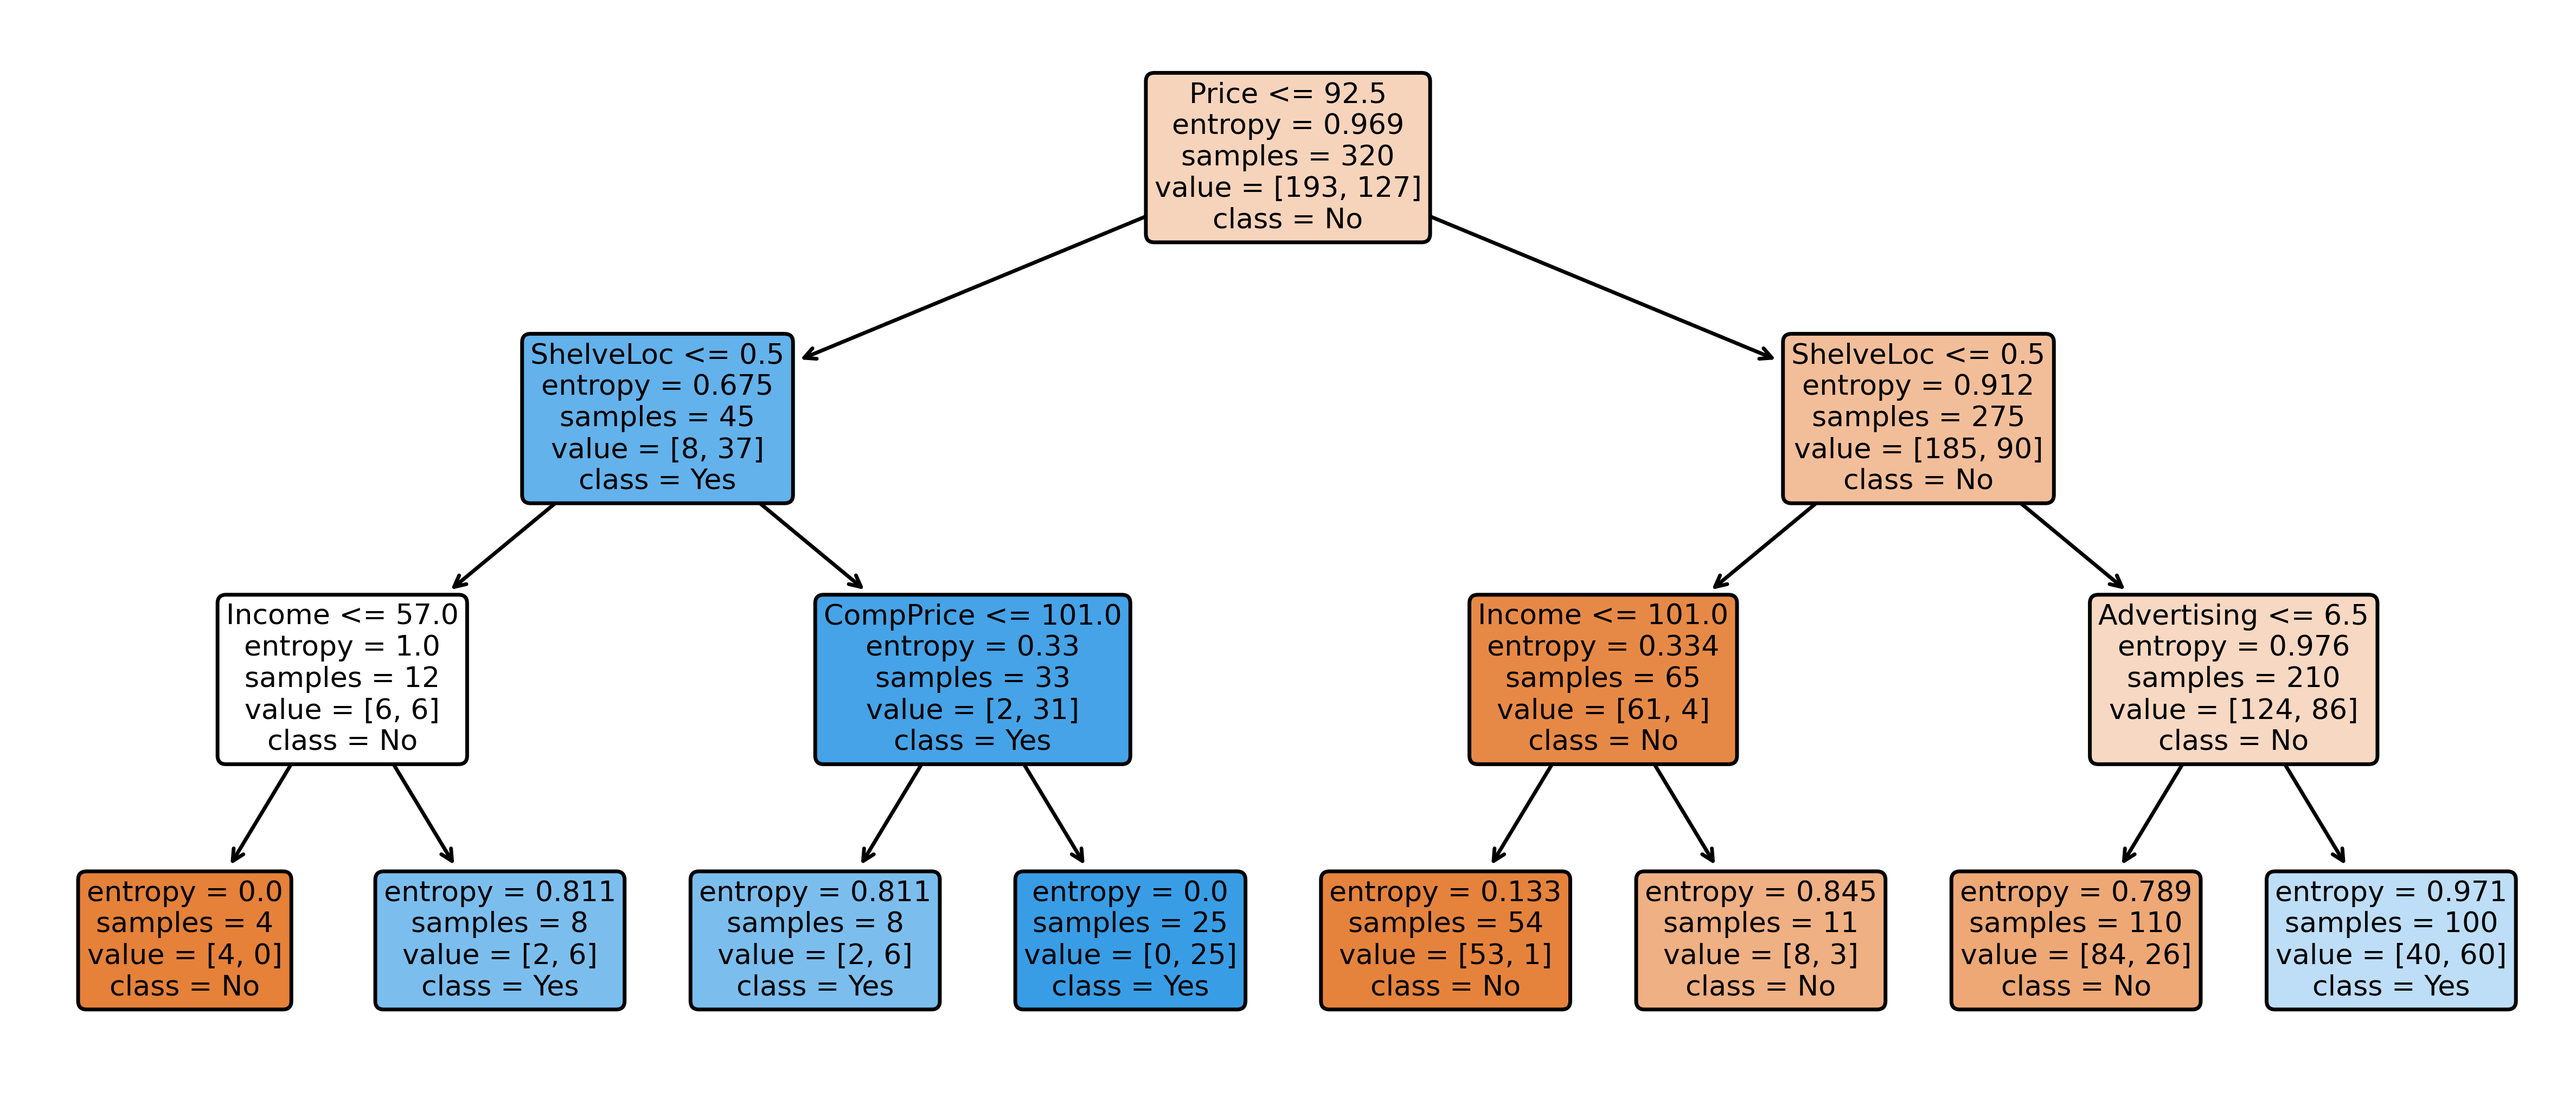

<Figure size 640x480 with 0 Axes>

In [23]:
# Visualizing Decision Trees
plt.figure(figsize=(12, 5), dpi=500)
tree.plot_tree(dt_clf,
               feature_names=list(X.columns),
               class_names=["No", "Yes"],
               filled=True,
               rounded=True)
plt.show()
plt.savefig('dtree.png')

**Key Insights**:

- **Root Node**: The initial split is based on the Price feature with a threshold of 92.5, highlighting Price as the most crucial factor in determining high or low sales.
- **Entropy and Samples**: Each node displays entropy, sample count, and the target variable distribution (High). Lower entropy signifies purer nodes. For instance, the root node has an entropy of 0.969 with 320 samples, divided into 193 ‘No’ and 127 ‘Yes’.
- **Feature Importance**: Features like ShelveLoc, Income, CompPrice, and Advertising are also used in the splits, indicating their significance in the model. ShelveLoc appears multiple times, underscoring its substantial impact on sales.
- **Class Distribution**: Leaf nodes show the final classification and sample distribution in each class. For example, one leaf node predicts ‘Yes’ for high sales with 37 out of 45 samples, indicating a strong prediction.
- **Decision Rules**: The tree outlines clear decision rules. For instance, if Price is less than or equal to 92.5 and ShelveLoc is less than or equal to 0.5, the model predicts ‘Yes’ for high sales.

In [25]:
# Print the classification report 
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

          No       0.78      0.74      0.76        43
         Yes       0.72      0.76      0.74        37

    accuracy                           0.75        80
   macro avg       0.75      0.75      0.75        80
weighted avg       0.75      0.75      0.75        80



**Insights**:

- **Balanced Performance**: The precision and recall values for both classes are well-aligned, suggesting that the model maintains consistent performance across both categories.
- **F1-Score**: The F1-scores for both classes are quite similar, indicating that the model effectively balances precision and recall.
- **Accuracy**: An overall accuracy of 75% indicates that the model correctly classifies 75% of the instances in the dataset.

**Considerations**:

- **Class Imbalance:** With support values of 43 for 'No' and 37 for 'Yes,' class imbalance is not a significant concern here.

- **Model Performance:** Although the model performs well, there is potential for further enhancement. Techniques such as hyperparameter tuning, feature engineering, or experimenting with different algorithms could help improve performance.

Confusion Matrix:


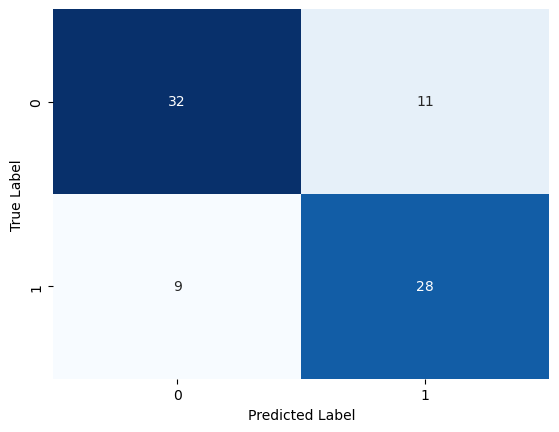

In [27]:
# Print the confusion matrix
print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
#plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

**Confusion Matrix Summary**:

Here, Class '0' represents 'No' (Low Sales) and Class '1' represents 'Yes' (High Sales).
- True Negatives (TN): 32 observations correctly predicted as Class ‘0’.
- False Positives (FP): 11 observations incorrectly predicted as Class ‘1’.
- False Negatives (FN): 9 observations incorrectly predicted as Class ‘0’.
- True Positives (TP): 28 observations correctly predicted as Class ‘1’.

**Insights**:

- **Balanced Performance:** The model demonstrates a well-rounded performance, maintaining a reasonable balance between precision and recall for class '1'.
- **Areas for Improvement:** The presence of false positives and false negatives highlights opportunities for enhancement. Implementing techniques like hyperparameter tuning, feature engineering, or experimenting with different algorithms could further boost the model's performance.
- **Class Imbalance:** The support values (43 for 'No' and 37 for 'Yes') indicate that class imbalance is not a significant concern in this case.

### Conclusion:

1.	In this notebook, a Decision-Tree Classifier model is built to predict the sales data for child car seats across various stores. The model yields a balanced performance as indicated by the model accuracy which was found to be 75%.
2.	In the model with criterion `entropy`, the training-set accuracy score is 76% while the test-set accuracy to be 75%. So, there is no sign of overfitting or underfitting.
3.	The confusion matrix and classification report yields a balanced model performance.
4.	The dataset does not suffer from significant class imbalance, as indicated by the support values (43 for ‘No’ and 37 for ‘Yes’).
5.	Despite the model’s overall good performance, there are opportunities for enhancement. Addressing false positives and false negatives through techniques like hyperparameter tuning, feature engineering, or experimenting with different algorithms could further improve the model’s accuracy.